In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy import stats
from scipy.optimize import least_squares, minimize
import scipy.stats as st

### final_data_clean.csv – данные профилей пользователей ВКонтакте + результаты тестов BigFive. Задача предсказания психометрик по имеющимся данным профиля.

In [2]:
data = pd.read_csv('final_data_clean.csv')
data.head()

,id,ext,agr,con,ner,open,about,activities,books,city,...,is_closed,movies,music,quotes,relation,sex,status,tv,video_count,wall_count
0,925142,0.80,0.50,0.70,0.80,0.8,0,0,0,2,...,0,0,0,0,0.0,2,113,0,157.0,1588.0
1,9608860,0.80,0.30,0.80,1.00,0.7,0,0,0,35,...,0,0,0,0,0.0,1,108,0,169.0,4930.0
2,3789820,0.69,0.79,0.71,0.68,0.8,142,0,6,2,...,0,0,0,994,0.0,1,9,0,153.0,1695.0
3,70653112,0.40,0.80,0.60,0.50,0.8,0,0,0,2,...,0,0,0,0,0.0,2,24,0,5.0,56.0
4,70653112,0.40,0.80,0.60,0.50,0.8,0,0,0,2,...,0,0,0,0,0.0,2,24,0,5.0,58.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               814 non-null    int64  
 1   ext              814 non-null    float64
 2   agr              814 non-null    float64
 3   con              814 non-null    float64
 4   ner              814 non-null    float64
 5   open             814 non-null    float64
 6   about            814 non-null    int64  
 7   activities       814 non-null    int64  
 8   books            814 non-null    int64  
 9   city             814 non-null    int64  
 10  followers_count  814 non-null    float64
 11  friends_count    814 non-null    float64
 12  groups           814 non-null    int64  
 13  interests        814 non-null    int64  
 14  is_closed        814 non-null    int64  
 15  movies           814 non-null    int64  
 16  music            814 non-null    int64  
 17  quotes          

In [5]:
data.describe()

,id,ext,agr,con,ner,open,about,activities,books,city,...,is_closed,movies,music,quotes,relation,sex,status,tv,video_count,wall_count
count,8.140000e+02,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,8.140000e+02,...,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,3.399586e+08,0.644312,0.689730,0.694533,0.711867,0.733145,5.479115,0.073710,0.110565,7.947972e+04,...,0.199017,0.173219,0.195332,24.479115,0.555283,1.459459,17.393120,1.310811,66.007371,207.567568
std,1.768117e+08,0.131898,0.147238,0.133161,0.156104,0.123290,63.551503,0.428931,0.671003,4.629902e+05,...,0.399506,1.015608,1.086619,195.603444,1.696176,0.498660,26.992191,13.750204,199.226332,843.510938
min,5.746000e+03,0.200000,0.200000,0.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.920544e+08,0.570000,0.600000,0.600000,0.600000,0.670000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.682504e+08,0.630000,0.700000,0.700000,0.730000,0.730000,0.000000,0.000000,0.000000,2.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,3.000000,7.000000
75%,5.065070e+08,0.730000,0.800000,0.800000,0.830000,0.800000,0.000000,0.000000,0.000000,1.470000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,25.000000,0.000000,33.000000,50.000000
max,5.718942e+08,1.000000,1.000000,1.000000,1.000000,1.000000,1432.000000,6.000000,11.000000,5.470025e+06,...,1.000000,13.000000,20.000000,2388.000000,8.000000,2.000000,140.000000,333.000000,2626.000000,11308.000000


## Create a one-dimensional sample size 65+Х, where Х – day of your birth.
## We chose feature "friends_count" (Source of probability: «Social behaviour, social interactions»)

In [7]:
sample_s = 65 + 23

In [12]:
one_dim = data.friends_count.sample(sample_s)
one_dim

12     216.0
497      0.0
745     63.0
362      3.0
11     137.0
       ...  
451     42.0
457      0.0
99     116.0
354     86.0
128    203.0
Name: friends_count, Length: 88, dtype: float64

<Axes: xlabel='friends_count', ylabel='Density'>

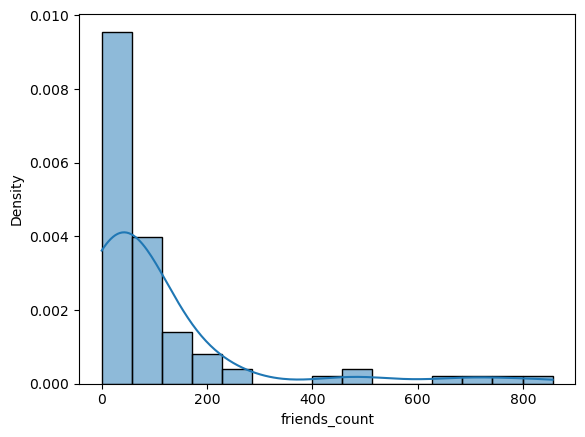

In [17]:
sns.histplot(one_dim, kde=True, stat="density", bins=int(1 + 3.32 * math.log(one_dim.count())))

In [20]:
# continious features
# 1. detection of best distribution:
DISTRIBUTIONS = [
    st.norm, # Normal distribution
    st.expon, # Exponential distribution
    st.gamma, # Gamma distribution
    st.beta, # Beta distribution
    st.lognorm, # Lognormal distribution
    st.uniform, # Uniform distribution
    st.t, # Student's t-distribution
    st.chi2, # Chi-squared distribution
    st.weibull_min, # Weibull distribution (minimum)
    st.pareto # Pareto distribution
]

def best_fit_distribution(data, bins=int(1 + 3.32 * math.log(one_dim.count()))):
    """Model data by finding best fit distribution to data"""
    distributions = DISTRIBUTIONS
    hist, bin_edges = np.histogram(data, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    best_distribution = None
    best_params = None
    best_sse = np.inf

    for distribution in distributions:
        try:
            params = distribution.fit(data)
            pdf = distribution.pdf(bin_centers, *params)
            sse = np.sum(np.power(hist - pdf, 2.0))

            if sse < best_sse:
                best_distribution = distribution
                best_params = params
                best_sse = sse
        except:
            continue

    return (best_distribution, best_params)

# 2. Parameters estimation:

def mle_params(distribution, data):
    return distribution.fit(data)

def residuals_ls(params, data, distribution):
    hist, bin_edges = np.histogram(data, bins=len(data), density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    expected = distribution.pdf(bin_centers, *params)
    return hist - expected

def ls_params(distribution, data):
    initial_guess = mle_params(distribution, data)
    result = least_squares(residuals_ls, initial_guess, args=(data, distribution))
    return result.x

def plot_best_fit(data, distribution, mle_params, ls_params):
    """Plot original data with MLE and Least Squares fit distributions."""
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    # Plot original data in histogram
    ax.hist(data, bins=50, density=True, alpha=0.6, color='b')

    # Plot the MLE fit distribution
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    mle_pdf = distribution.pdf(x, *mle_params)
    ax.plot(x, mle_pdf, 'k', linewidth=2, label=f"{distribution.name} (MLE)")

    # Plot the Least Squares fit distribution
    ls_pdf = distribution.pdf(x, *ls_params)
    ax.plot(x, ls_pdf, 'r--', linewidth=2, label=f"{distribution.name} (LS)")

    title = f"Fit results: {distribution.name}"
    ax.set_title(title)
    plt.legend()
    plt.show()

In [22]:
def qq_plot_estimation(data, distribution, distribution_name):
    # Determination of the parameters of the best-fitted distribution of the average value for specific atributes
    x = np.linspace(np.min(data), np.max(data))

    # The distribution parameters are determined using the fit function based on the maximum likelihood method
    params_mle = distribution.fit(data)
    params_ls = ls_params(distribution, data)

    # Plotting a quantile biplot for empirical and theoretical distribution
    # Building a quantile biplot

    fig, (ax_mle, ax_ls) = plt.subplots(1, 2, figsize=(18, 6))
    fig.suptitle(f'QQ-plot with {distribution_name} distribution')

    stats.probplot(data, sparams=params_mle, dist=distribution, plot=ax_mle)
    ax_mle.set_title(f'QQ-plot for MLE')
    ax_mle.grid()

    stats.probplot(data, sparams=params_ls, dist=distribution, plot=ax_ls)
    ax_ls.set_title(f'QQ-plot for Least Square')
    ax_ls.grid()

/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:6120: RuntimeWarning: overflow encountered in divide
  return np.sum((1 + np.log(shifted/scale)/shape**2)/shifted)
/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Best fit distribution: beta
MLE parameters: (0.7517490464099356, 160.78893775822132, -2.5674352550307444e-27, 8557.450293480553)
Least Squares parameters: [9.32181174e-01 5.45543151e+01 4.86363634e+00 8.55984331e+03]



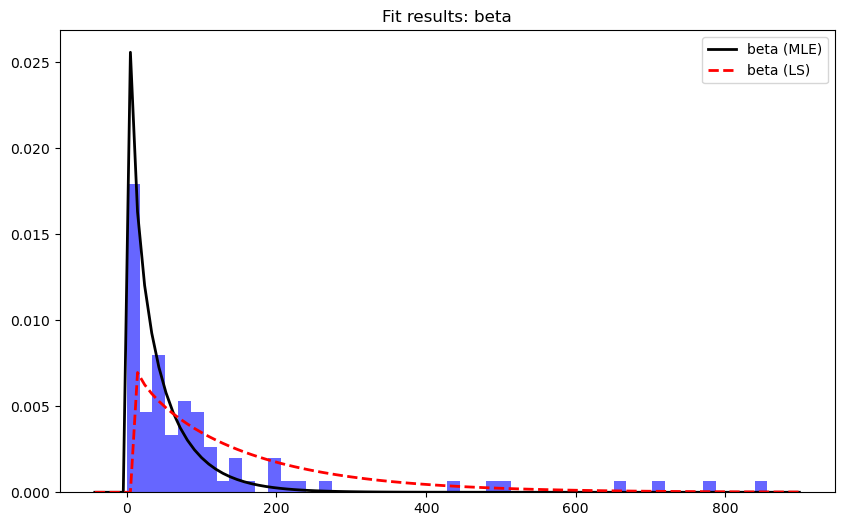

In [24]:
best_distribution, best_params = best_fit_distribution(one_dim)
data_samples_distribution = [best_distribution.name, best_distribution]
print(f"Best fit distribution: {best_distribution.name}")

mle_parameters = mle_params(best_distribution, one_dim)
print(f"MLE parameters: {mle_parameters}")

ls_parameters = ls_params(best_distribution, one_dim)
print(f"Least Squares parameters: {ls_parameters}\n")

plot_best_fit(one_dim, best_distribution, mle_parameters, ls_parameters)

/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/roman14/.conda/envs/Pycharm/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


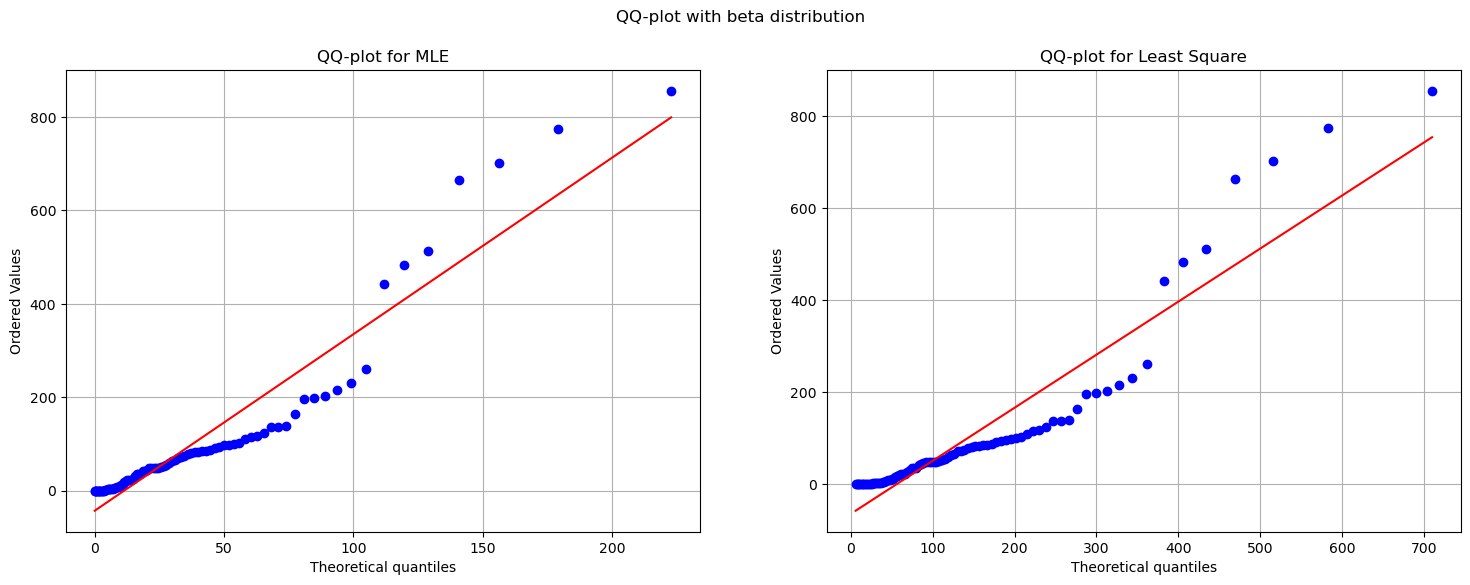

In [33]:
qq_plot_estimation(one_dim, data_samples_distribution[1], data_samples_distribution[0])